In [26]:
import pandas as pd

# Load the dataset
df = pd.read_csv('./ATL Flight Data Final.csv')

# Display the first few rows of the dataset
df.head()


,ARRIVAL TIME,WHEELS ON,WHEELS OFF,DEPARTURE TIME,SCHEDULED ARRIVAL,SCHEDULED DEPARTURE,FLIGHT_DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DESTINATION_AIRPORT-1,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,1/1/1900 8:45:00 PM,1/1/1900 8:43:00 PM,1/1/1900 8:16:00 PM,1/1/1900 7:57:00 PM,1/1/1900 9:00:00 PM,1/1/1900 8:03:00 PM,6/5/2022,Sunday,Delta Air Lines Inc.,2424.0,...,NaN,NaN,NaN,GSP,Greenville-Spartanburg International Airport,Greer,SC,USA,34.89567,-82.21886
1,1/1/1900 2:41:00 PM,1/1/1900 2:32:00 PM,1/1/1900 12:52:00 PM,1/1/1900 12:37:00 PM,1/1/1900 3:00:00 PM,1/1/1900 12:40:00 PM,6/5/2022,Sunday,Delta Air Lines Inc.,847.0,...,NaN,NaN,NaN,JFK,John F. Kennedy International AirportÂ (New Yo...,New York,NY,USA,40.63975,-73.77893
2,1/1/1900 11:35:00 PM,1/1/1900 11:25:00 PM,1/1/1900 9:21:00 PM,1/1/1900 9:05:00 PM,1/1/1900 11:09:00 PM,1/1/1900 8:53:00 PM,6/5/2022,Sunday,Delta Air Lines Inc.,846.0,...,12.0,NaN,NaN,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
3,1/1/1900 6:33:00 PM,1/1/1900 6:29:00 PM,1/1/1900 5:32:00 PM,1/1/1900 5:20:00 PM,1/1/1900 6:45:00 PM,1/1/1900 5:20:00 PM,6/5/2022,Sunday,Delta Air Lines Inc.,1542.0,...,NaN,NaN,NaN,CVG,Cincinnati/Northern Kentucky International Air...,Covington,KY,USA,39.04614,-84.66217
4,1/1/1900 12:19:00 AM,1/1/1900 12:13:00 AM,1/1/1900 10:52:00 PM,1/1/1900 10:42:00 PM,1/1/1900 12:35:00 AM,1/1/1900 10:45:00 PM,6/5/2022,Sunday,Delta Air Lines Inc.,2829.0,...,NaN,NaN,NaN,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056


In [27]:
df['DEPARTURE_DELAY']

0         -6.0
1         -3.0
2         12.0
3          0.0
4         -3.0
          ... 
886544     4.0
886545    -4.0
886546     7.0
886547    -3.0
886548    21.0
Name: DEPARTURE_DELAY, Length: 886549, dtype: float64

In [100]:
df['FLIGHT_DATE'] = pd.to_datetime(df['FLIGHT_DATE'], errors='coerce')


In [101]:
features = ['ARRIVAL_DELAY', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DAY_OF_WEEK',
                   'FLIGHT_DATE']
output = ['DEPARTURE_DELAY']
df2 = df[features + output]

In [102]:
df2 = df2.dropna()

In [103]:
sample_size_ratio = 0.02

In [104]:
df2 = df2.sample(frac=sample_size_ratio, random_state=42)

In [105]:
X = df2[features]
y = df2['DEPARTURE_DELAY']

In [115]:
df2

,ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK,FLIGHT_DATE,DEPARTURE_DELAY
476837,-7.0,Delta Air Lines Inc.,ATL,DAB,Thursday,2021-08-26,-2.0
567128,-15.0,Delta Air Lines Inc.,ATL,SAV,Saturday,2022-09-17,-8.0
539819,-10.0,Delta Air Lines Inc.,ATL,JAX,Saturday,2021-10-02,-1.0
50429,-17.0,Delta Air Lines Inc.,ATL,BOI,Saturday,2022-07-02,-3.0
880753,-13.0,Delta Air Lines Inc.,ATL,TUL,Thursday,2022-03-31,0.0
...,...,...,...,...,...,...,...
403710,-7.0,Delta Air Lines Inc.,ATL,LGA,Sunday,2020-06-07,-4.0
53755,53.0,Delta Air Lines Inc.,ATL,PHX,Sunday,2021-02-07,-4.0
44786,3.0,Delta Air Lines Inc.,ATL,JAX,Monday,2022-06-27,0.0
682793,-12.0,Delta Air Lines Inc.,ATL,RDU,Wednesday,2021-07-07,-2.0


In [107]:
X['Year'] = df2['FLIGHT_DATE'].dt.year
X['Month'] = df2['FLIGHT_DATE'].dt.month
X['Day'] = df2['FLIGHT_DATE'].dt.day

# Drop the original 'FLIGHT_DATE' column
X = X.drop('FLIGHT_DATE', axis=1)


In [109]:
categorical_feat = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DAY_OF_WEEK']

In [110]:
cat_dum = pd.get_dummies(X, columns= categorical_feat,drop_first=True)

In [118]:
X = X.drop(columns=categorical_feat)

In [121]:
X = cat_dum.reset_index().merge(X.reset_index(0)).drop(columns=["index"])

In [122]:
X

,ARRIVAL_DELAY,Year,Month,Day,AIRLINE_American Airlines Inc.,AIRLINE_Delta Air Lines Inc.,AIRLINE_Endeavor Air Inc.,AIRLINE_Envoy Air,AIRLINE_ExpressJet Airlines LLC,AIRLINE_Frontier Airlines Inc.,...,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_VLD,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_XNA,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday
0,-7.0,2021,8,26,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,-15.0,2022,9,17,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,-10.0,2021,10,2,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,-17.0,2022,7,2,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,-13.0,2022,3,31,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17311,-7.0,2020,6,7,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
17312,53.0,2021,2,7,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
17313,3.0,2022,6,27,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
17314,-12.0,2021,7,7,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalizing the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((13852, 190), (3464, 190), (13852,), (3464,))

In [125]:
y_test

22829     -1.0
881852    -5.0
533460    -5.0
349076    -5.0
682803    -1.0
          ... 
541153     0.0
190888    -5.0
28452     14.0
407472    40.0
299890    -3.0
Name: DEPARTURE_DELAY, Length: 3464, dtype: float64

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [127]:
from sklearn.model_selection import cross_val_score
import numpy as np


In [128]:
%%time
n_estimators = 100
max_depth = 20
rf_regressor = RandomForestRegressor(n_estimators= n_estimators,max_depth=max_depth, random_state=42)
cross_val_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation for Estimatior N {n_estimators} and Max Depth {max_depth}::", cross_val_scores)
mse_scores = -cross_val_scores
print("MSE ::", mse_scores)
# Print the mean and standard deviation of the cross-validation scores
print("Mean MSE ::", np.mean(mse_scores))
print("SD ::", np.std(mse_scores))

Cross-validation for Estimatior N 100 and Max Depth 20:: [ -81.12977344 -112.06431378  -76.77692458  -73.27474835  -74.72355565]
MSE :: [ 81.12977344 112.06431378  76.77692458  73.27474835  74.72355565]
Mean MSE :: 83.59386315865541
SD :: 14.479471218698464
CPU times: total: 41.4 s
Wall time: 41.9 s


In [143]:
df2["DEPARTURE_DELAY"].min(), df2["DEPARTURE_DELAY"].max()

(-22.0, 979.0)

In [67]:
!pip install joblib


Defaulting to user installation because normal site-packages is not writeable


In [133]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from joblib import Parallel, delayed, Memory
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors Regression": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

param_grids = {
    "Linear Regression": {},
    "Ridge Regression": {'alpha': [0.1, 1, 10]},
    "Lasso Regression": {'alpha': [0.1, 1, 10]},
    "Support Vector Regression": {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]},
    "K-Nearest Neighbors Regression": {'n_neighbors': [3, 5, 7]},
    "Decision Tree": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    "Gradient Boosting": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

memory = Memory("cache_directory", verbose=0)

@memory.cache
def parallel_cross_validate(name, model, param_grid, X, y, cv=5, scoring='neg_mean_squared_error'):
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring)
        grid_search.fit(X, y)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
    cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring=scoring)
    print(name, {'Best Model': best_model, 'Cross-Validation Scores': cv_scores})
    return name, {'Best Model': best_model, 'Cross-Validation Scores': cv_scores}

results_parallel = Parallel(n_jobs=-1)(
    delayed(parallel_cross_validate)(
        name, model, param_grids[name], X, y, cv=5, scoring='neg_mean_squared_error'
    ) for name, model in models.items()
)

for name, result in results_parallel:
    print(f"\n{name}:")
    print(f"Best Model: {result['Best Model']}")
    print(f"Cross-Validation Scores: {result['Cross-Validation Scores']}")



Linear Regression:
Best Model: LinearRegression()
Cross-Validation Scores: [-101.33944353 -122.8062038  -107.5143826   -99.19660935  -99.70202942]

Ridge Regression:
Best Model: Ridge(alpha=10)
Cross-Validation Scores: [-100.90045891 -122.21642093 -106.8434701   -97.80837724  -99.39230937]

Lasso Regression:
Best Model: Lasso(alpha=0.1)
Cross-Validation Scores: [-102.98710242 -123.84344251 -108.90492465  -99.04693785 -101.53366039]

Support Vector Regression:
Best Model: SVR(C=10, epsilon=1)
Cross-Validation Scores: [-525.04200073 -708.05881119 -504.18078043 -412.50989185 -355.3897689 ]

K-Nearest Neighbors Regression:
Best Model: KNeighborsRegressor(n_neighbors=7)
Cross-Validation Scores: [ -95.1878152  -127.09142126  -85.26817611  -79.07082452  -80.11336755]

Decision Tree:
Best Model: DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
Cross-Validation Scores: [ -81.7403418  -119.91955773  -90.28802524  -84.40082384  -88.83273582]

Random Forest:
Best Model: R

In [135]:
# Selecting Best Model from cross validation
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=10),
    "Lasso Regression" : Lasso(alpha=0.1),
    "Support Vector Regression":SVR(C=10, epsilon=1), 
    "K-Nearest Neighbors Regression": KNeighborsRegressor(n_neighbors=7),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42),
    "Random Forest": RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Function to train and evaluate models
def train_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Predict on the test set
        y_pred = model.predict(X_test)
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        # Store results
        results[name] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}
    return results

# Train and evaluate the models
model_performance = train_evaluate(models, X_train, X_test, y_train, y_test)
model_performance


{'Linear Regression': {'MAE': 7.040947297295117,
  'RMSE': 10.73761352686351,
  'R²': 0.9217544936607865},
 'Ridge': {'MAE': 7.018159878411133,
  'RMSE': 10.67607305818486,
  'R²': 0.9226488201811258},
 'Lasso Regression': {'MAE': 6.989220035134091,
  'RMSE': 10.678845687247879,
  'R²': 0.9226086379948456},
 'Support Vector Regression': {'MAE': 7.87118082258518,
  'RMSE': 30.44596565589434,
  'R²': 0.37092362663214073},
 'K-Nearest Neighbors Regression': {'MAE': 11.225585615308477,
  'RMSE': 31.063971201851015,
  'R²': 0.34512589492896895},
 'Decision Tree': {'MAE': 5.241448661376369,
  'RMSE': 9.770539162970042,
  'R²': 0.9352140356334033},
 'Random Forest': {'MAE': 5.04945725013452,
  'RMSE': 9.428286861813099,
  'R²': 0.9396733174340595},
 'Gradient Boosting': {'MAE': 5.0053980693306,
  'RMSE': 8.685894023254365,
  'R²': 0.9487996510853639}}

In [140]:
models.keys()

dict_keys(['Linear Regression', 'Ridge', 'Lasso Regression', 'Support Vector Regression', 'K-Nearest Neighbors Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'])

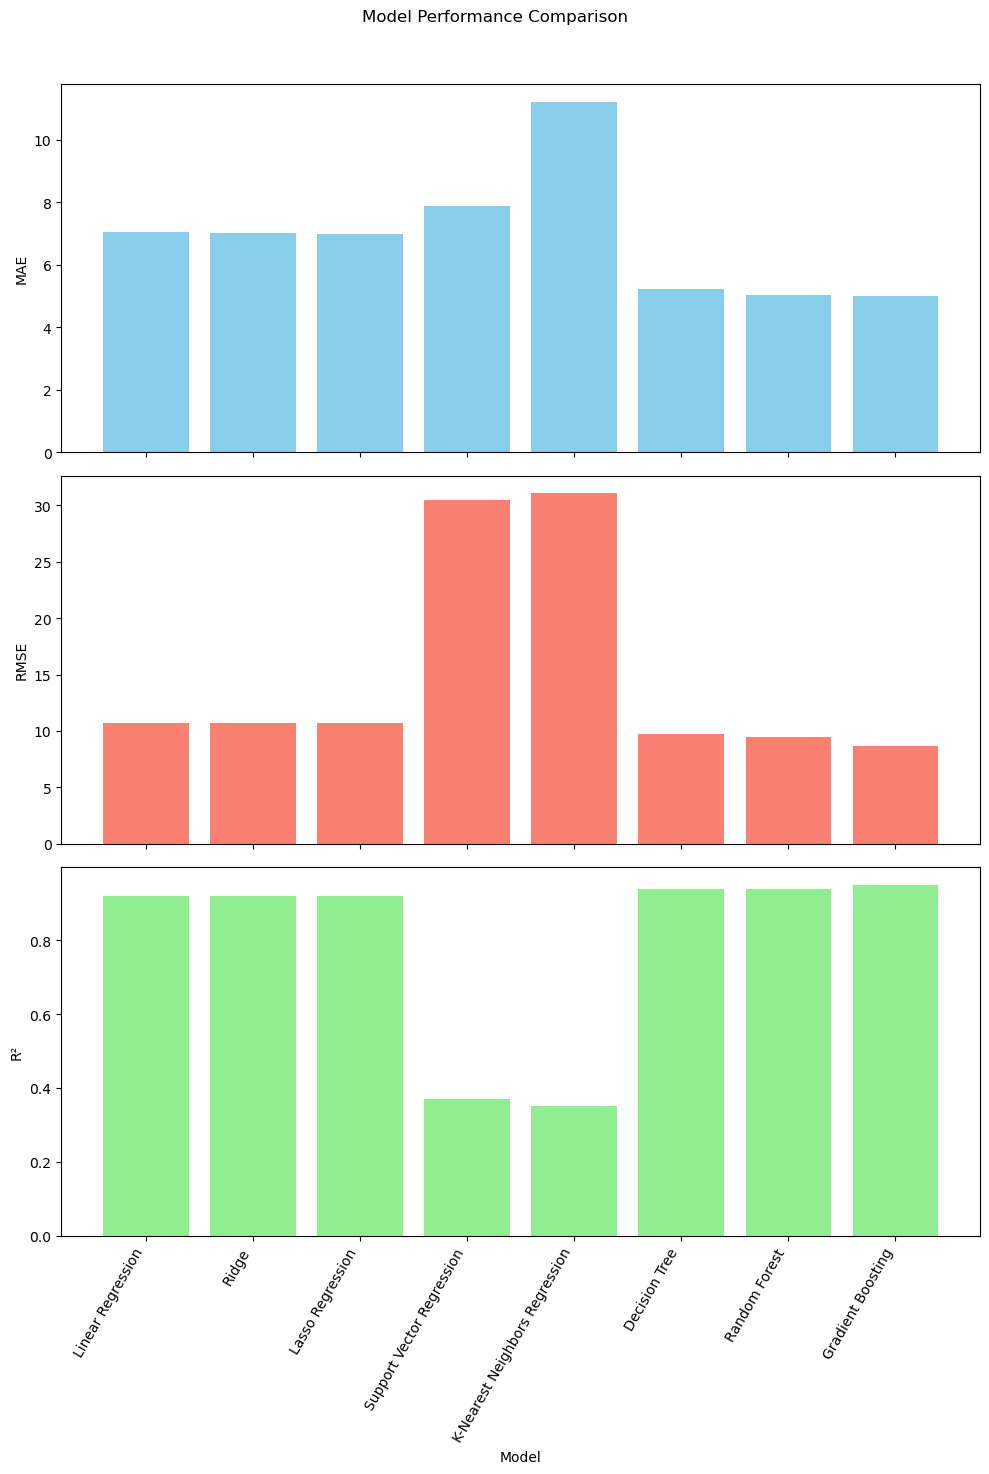

In [142]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), sharex=True)

metrics = ['MAE', 'RMSE', 'R²']
colors = ['skyblue', 'salmon', 'lightgreen']

for i, metric in enumerate(metrics):
    axes[i].bar(models.keys(), model_performance_df[metric], color=colors[i])
    axes[i].set_ylabel(metric)

plt.xlabel('Model')
plt.suptitle('Model Performance Comparison')
plt.xticks(rotation=60, ha='right') 
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

In [145]:
model_performance_df['Combined Score'] = (
    model_performance_df['MAE'] + model_performance_df['RMSE'] + model_performance_df['R²']
)

best_model = model_performance_df.loc[model_performance_df['Combined Score'].idxmin()]

print("Best Model based on Combined Score:")
print(best_model)

Best Model based on Combined Score:
Model             Gradient Boosting
MAE                            5.01
RMSE                           8.69
R²                             0.95
Combined Score                14.65
Name: 7, dtype: object
